# PRACTICAL LECTURE 4

# PART1. Autoencoders

1. Import libraries

In [9]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

2. Convert vector to image.
The following function allows to convert a vector to a image


In [11]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

3. We now write a function which allows to display the images using the omshow() function.

In [12]:
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

4. Define a data loading step and load the MNIST dataset

In [14]:
batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

1.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
dataloader

5. Fix the used device

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

6. Define the Autoencoder model architecture and reconstruction loss
with : 
n = 28 x 28 = 784

A. Use d = 30  for standard AE (under-complete hidden layer)

B. Use d = 500 for denoising AE (over-complete hidden layer)

C. Explain the difference between standard AE and denoising AE.
Analyse the results and conclude.


In [4]:
d=30;

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [32]:
class Denoising_Autoencodeur(nn.Module):

    def __init__(self):
        super(Denoising_Autoencodeur,self).__init__()
        
        #encoder
        self.encodeur=nn.Sequential(
            nn.Linear(28*28,500),
            nn.ReLU(),
            nn.Linear(500,250),
            nn.ReLU()
        )
        #decodeur
        self.decodeur=nn.Sequential(
            nn.Linear(250,500),
            nn.ReLU(),
            nn.Linear(500,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        x=self.encodeur(x)
        x=self.decodeur(x)
        return x
    
model2=Denoising_Autoencodeur().to(device)

7. Configure the optimiser. We use here : learning_rate equals to 1e-3

In [5]:
learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

In [37]:
optimizer2 = torch.optim.Adam(
    model2.parameters(),
    lr=learning_rate,
)

8. Train the standard autoencoder and the denoising autoencoder using the following code :


epoch [1/20], loss:0.2028
epoch [2/20], loss:0.1520
epoch [3/20], loss:0.1192
epoch [4/20], loss:0.1101
epoch [5/20], loss:0.0996
epoch [6/20], loss:0.0916
epoch [7/20], loss:0.0830
epoch [8/20], loss:0.0777
epoch [9/20], loss:0.0797
epoch [10/20], loss:0.0773
epoch [11/20], loss:0.0714
epoch [12/20], loss:0.0740
epoch [13/20], loss:0.0658
epoch [14/20], loss:0.0652
epoch [15/20], loss:0.0599
epoch [16/20], loss:0.0633
epoch [17/20], loss:0.0612
epoch [18/20], loss:0.0565
epoch [19/20], loss:0.0567
epoch [20/20], loss:0.0570


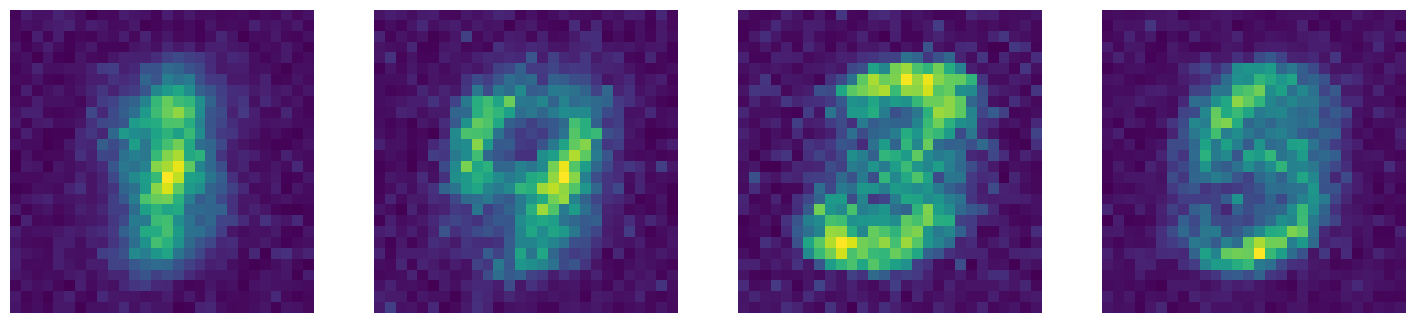

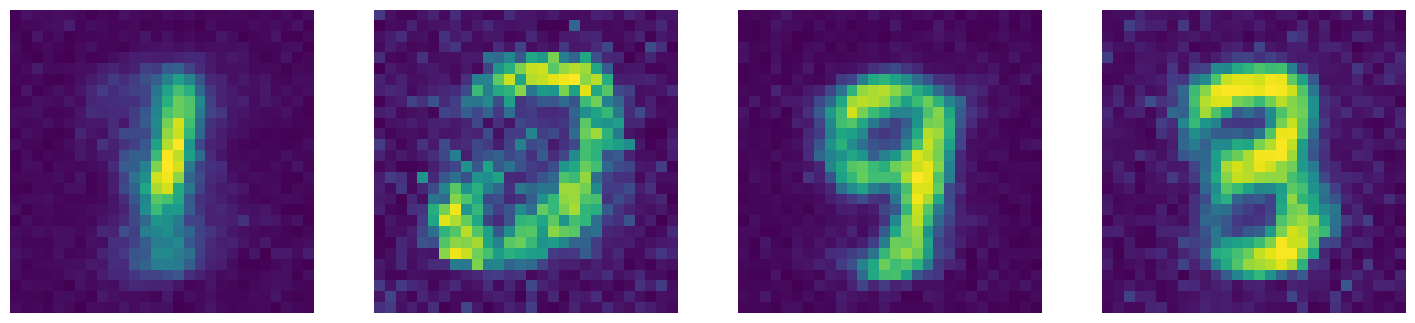

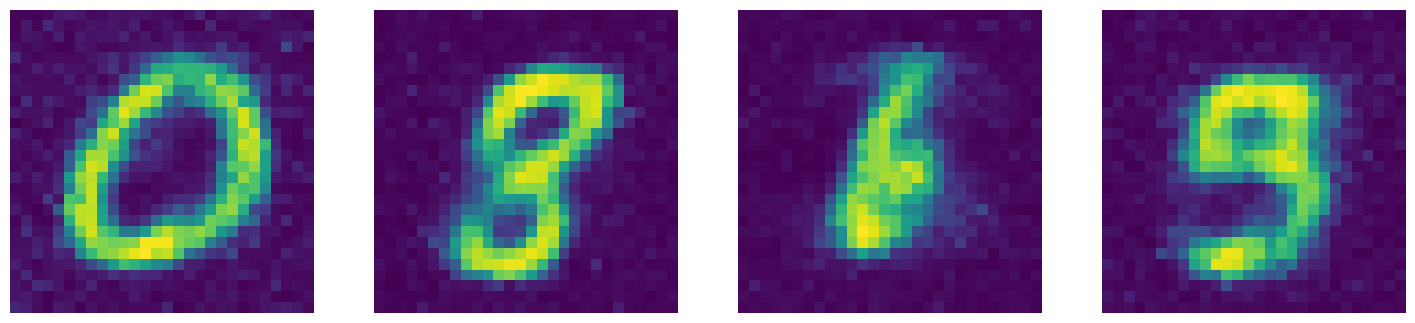

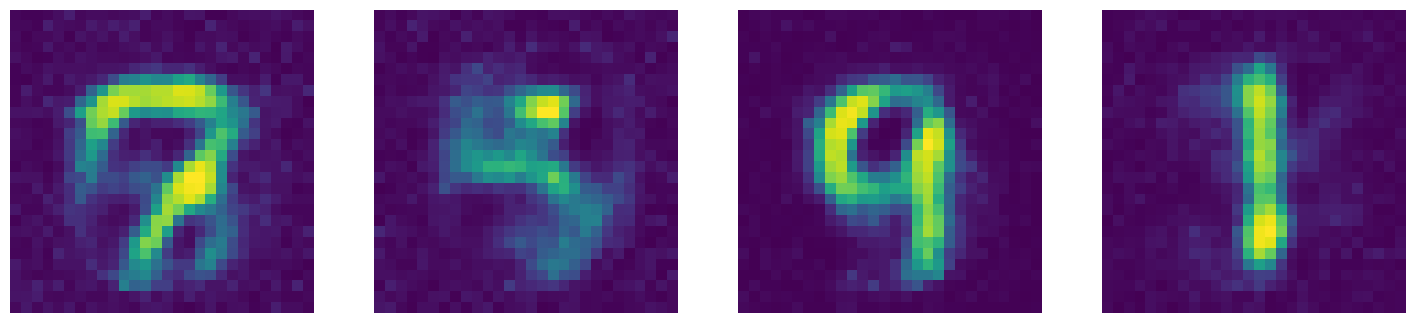

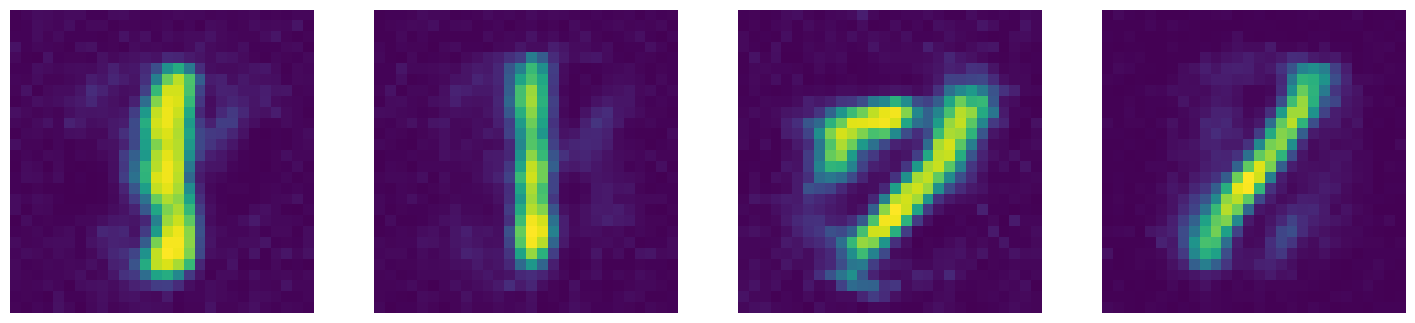

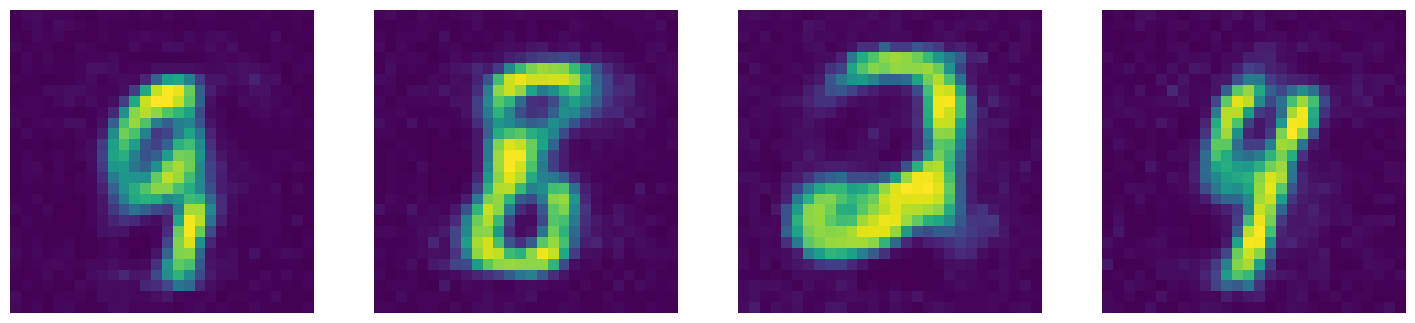

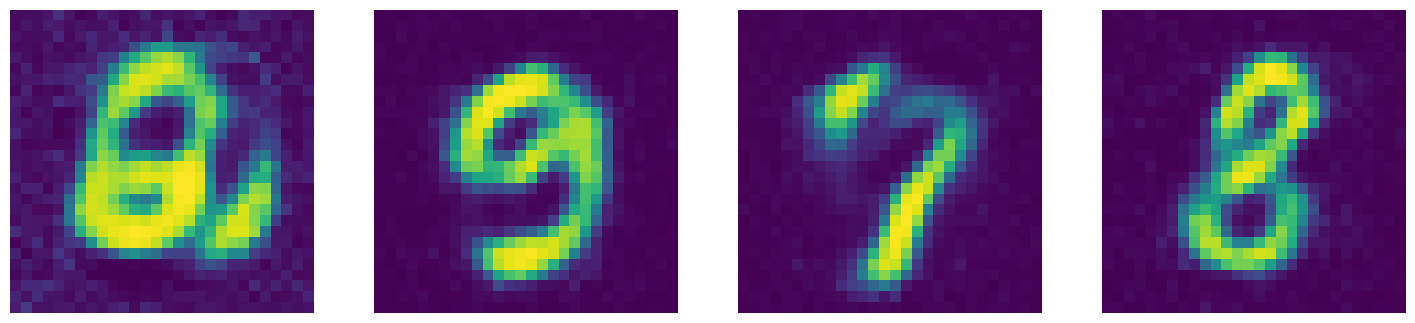

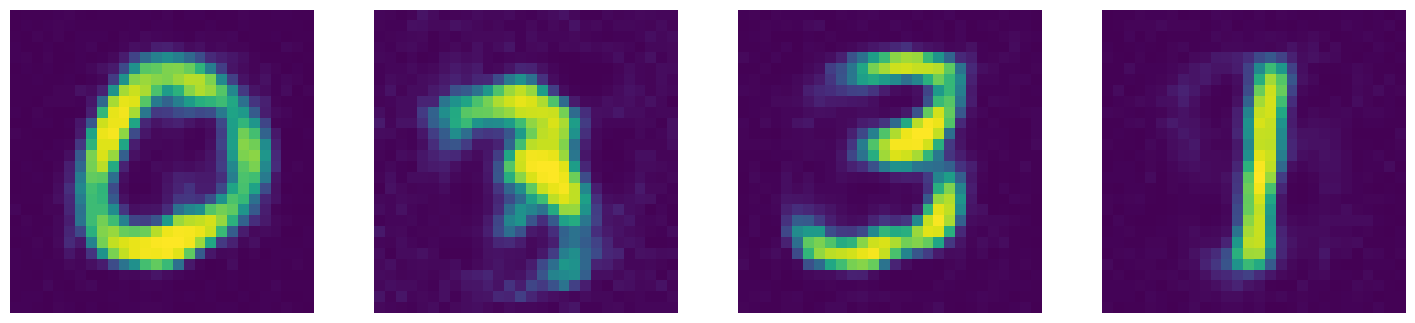

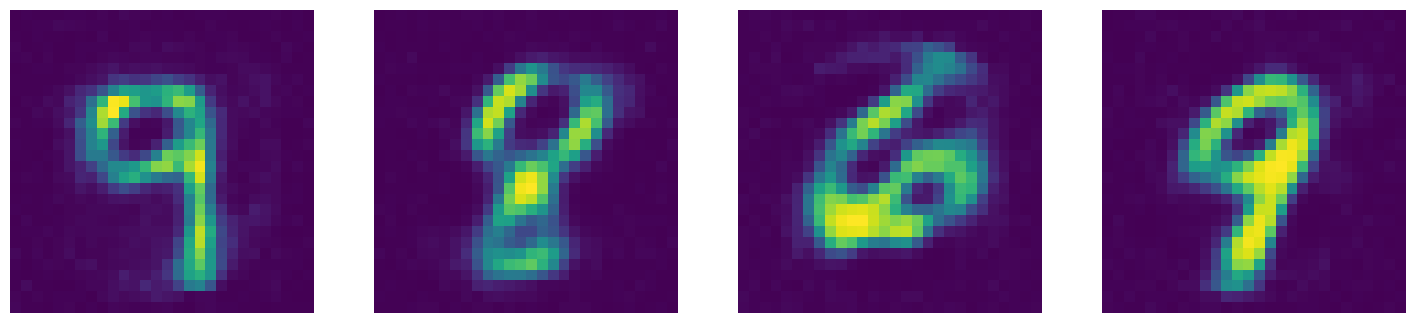

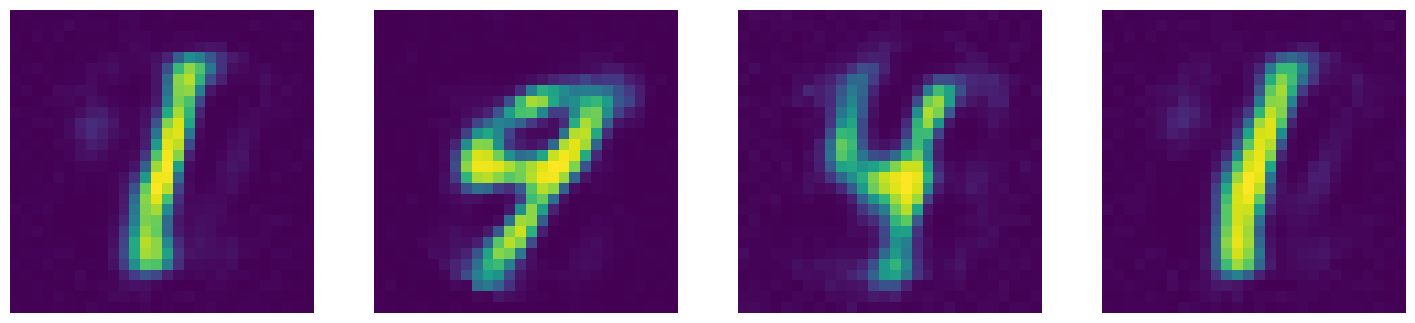

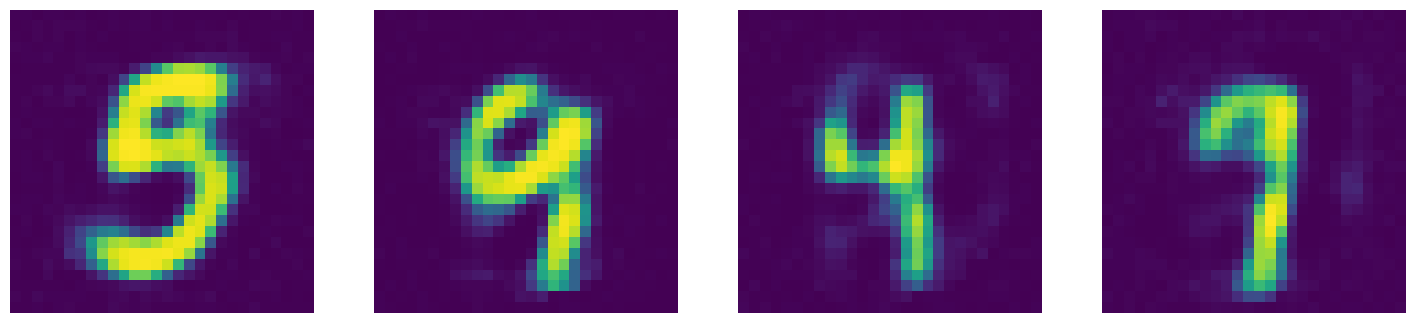

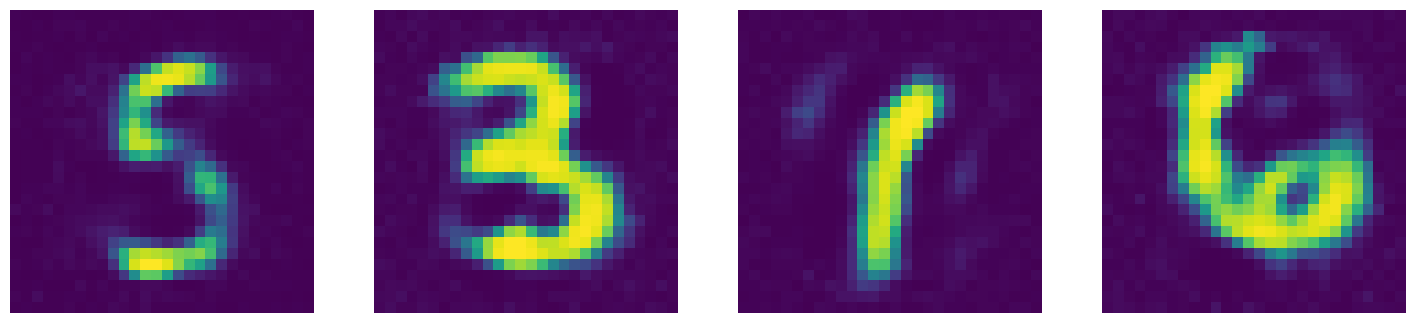

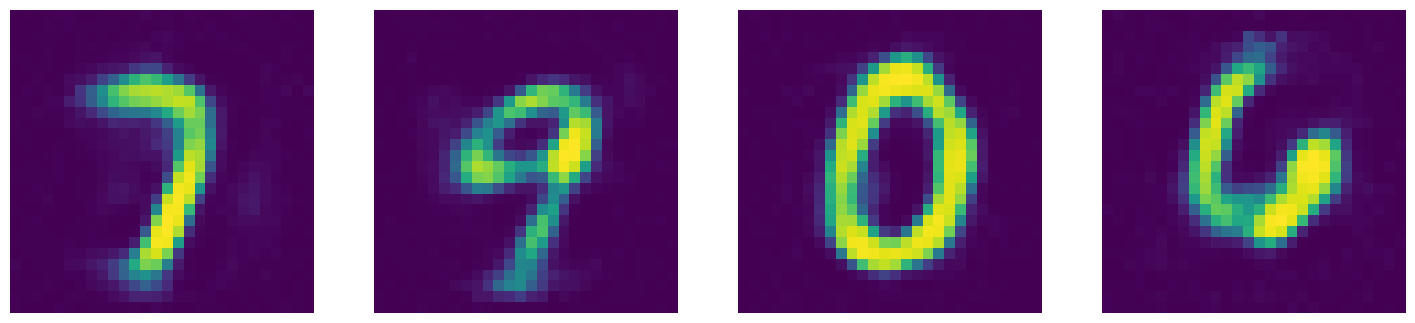

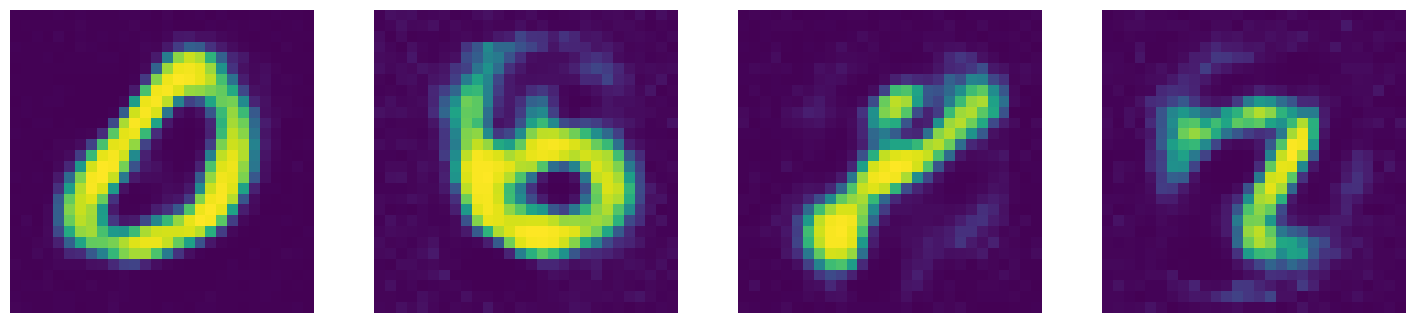

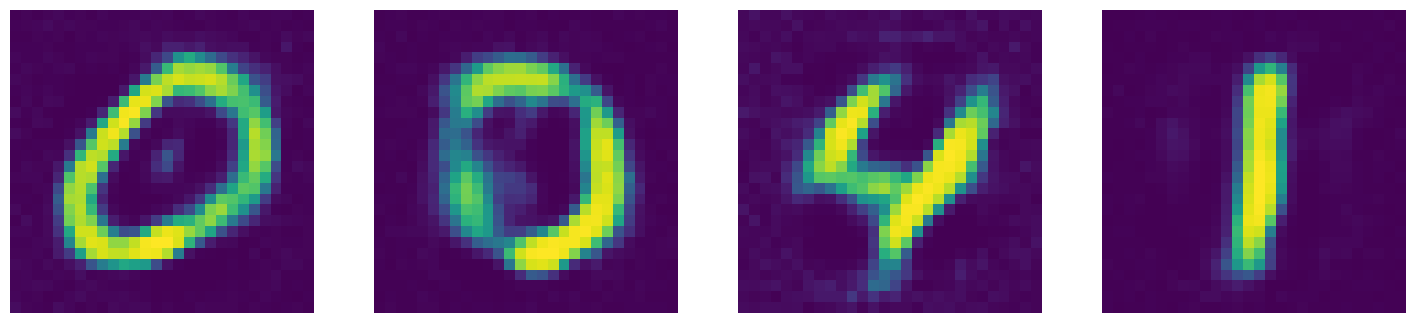

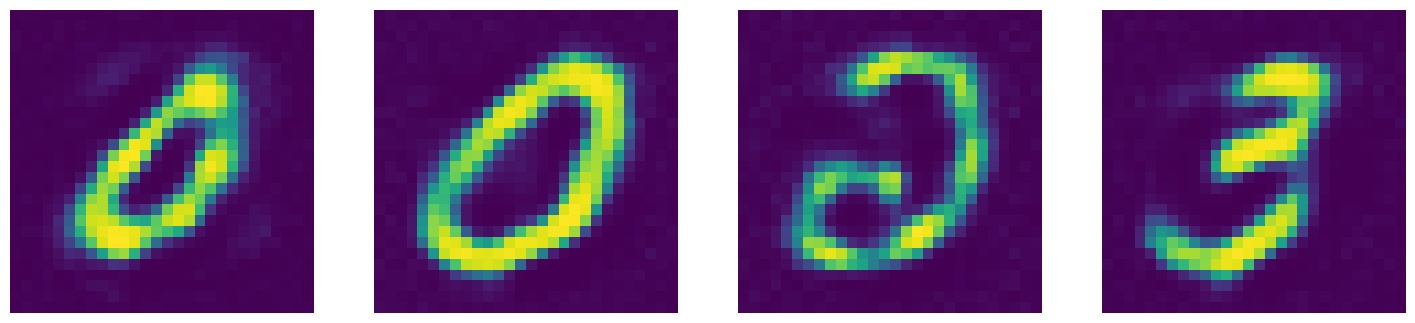

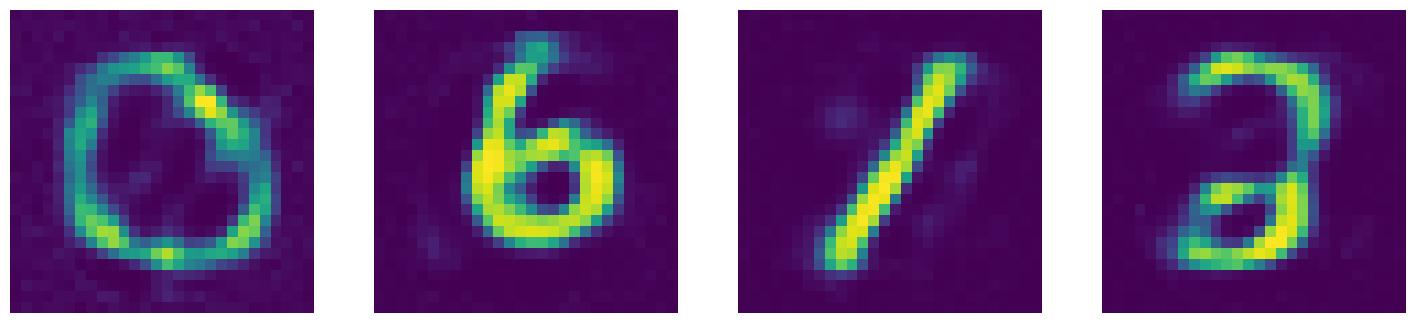

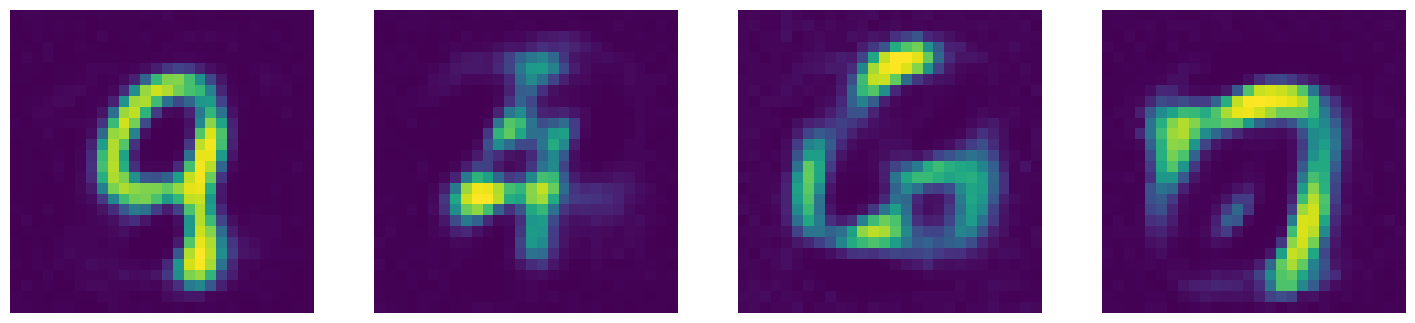

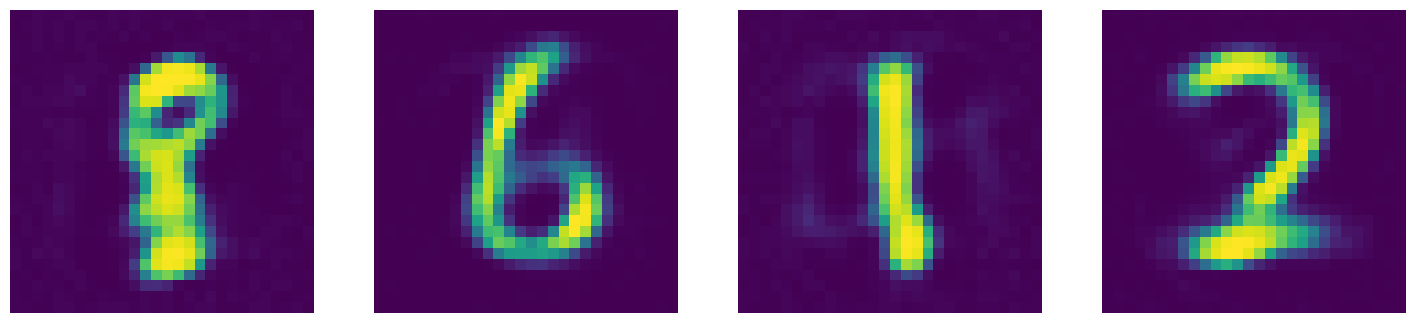

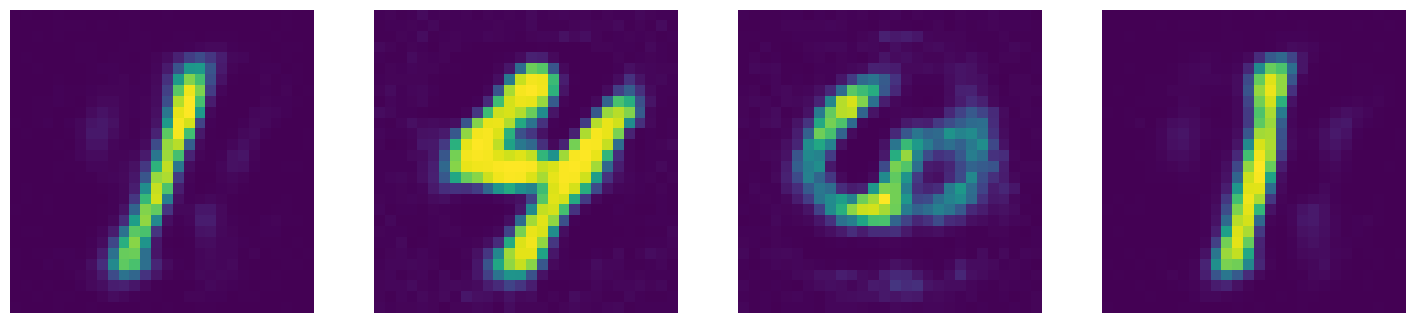

In [22]:
num_epochs = 20
#do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        #noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

In [38]:
for epoch in range(20):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        #noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model2(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

epoch [1/20], loss:0.9275
epoch [2/20], loss:0.9257
epoch [3/20], loss:0.9212
epoch [4/20], loss:0.9227
epoch [5/20], loss:0.9282
epoch [6/20], loss:0.9252
epoch [7/20], loss:0.9242


9. Visualise a few kernels of the encoder :


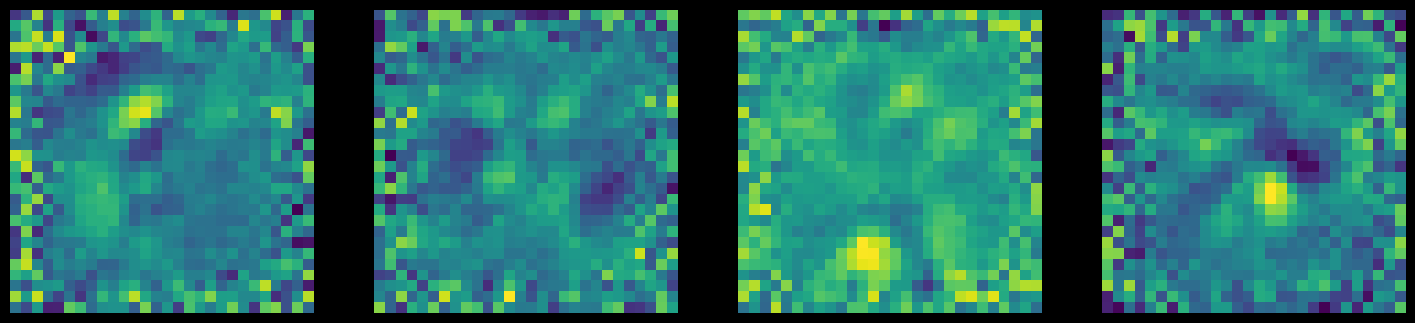

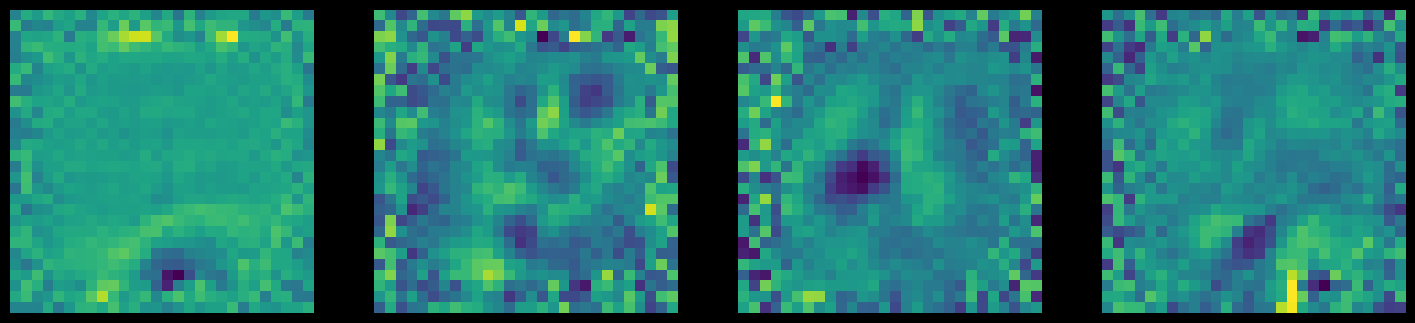

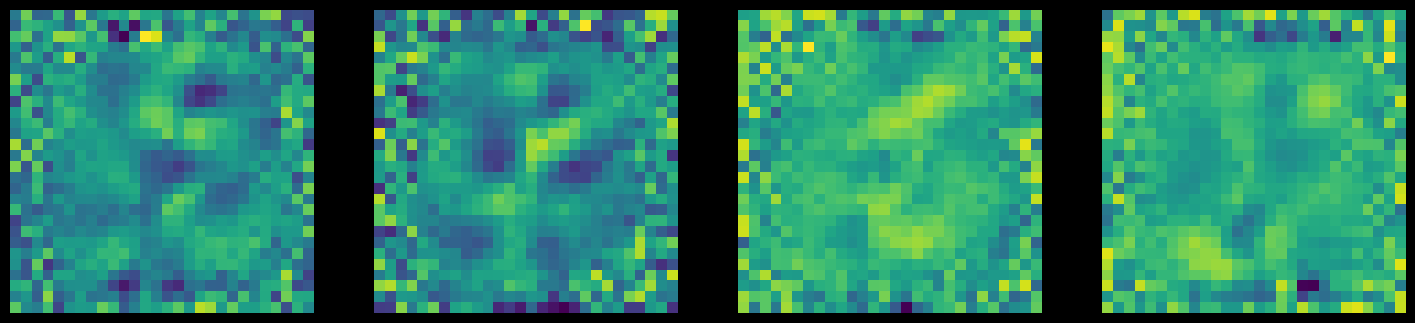

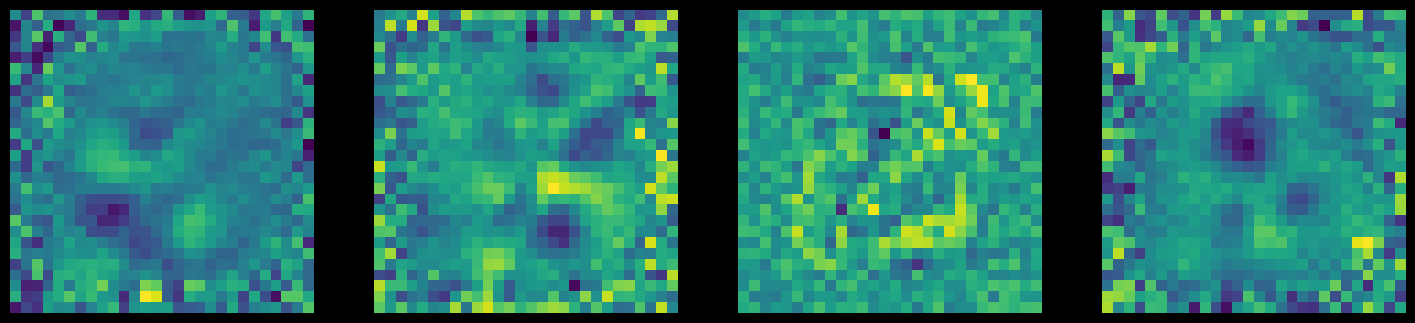

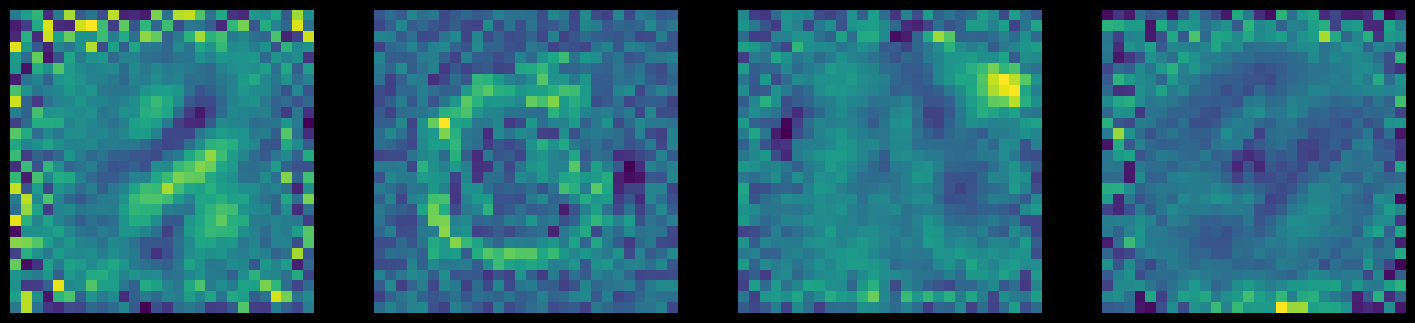

In [44]:
display_images(None, model.encoder[0].weight, 5)

10. Analyse the obtained results.

11. Changes the parameters of the Autoencoder and analyse theirs impact. Conclude.

avec un autoencodeur type denoising, l'entrainement est plus et l'algorithme de descente de gradient ne converge pas donc le resultat est moins meilleur